## Домашнее задание к занятию №1 от 04.11.2019 г. «Традиционные аналитические подходы»
ФИО: Кривова Татьяна Сергеевна

**1. Загрузить таблицу из файла «продажи.csv»**

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np

from datetime import datetime, date

import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
raw_data = pd.read_csv('продажи.csv') # raw_data.shape --> (14596, 5)

In [4]:
raw_data.info() # отсутствующих значений нет
raw_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 5 columns):
Покупатель         14596 non-null object
Сумма              14596 non-null float64
Название фильма    14596 non-null object
Дата платежа       14596 non-null object
Магазин            14596 non-null object
dtypes: float64(1), object(4)
memory usage: 342.2+ KB


,Покупатель,Сумма,Название фильма,Дата платежа,Магазин
0,Peter Menard,7.99,Rules Human,2007-02-15 22:25:46,Магазин 1
1,Peter Menard,1.99,Majestic Floats,2007-02-16 17:23:14,Магазин 2
2,Peter Menard,7.99,Maiden Home,2007-02-16 22:41:45,Магазин 1
3,Peter Menard,2.99,Hyde Doctor,2007-02-19 19:39:56,Магазин 1
4,Peter Menard,7.99,Massacre Usual,2007-02-20 17:31:48,Магазин 1
5,Peter Menard,5.99,Annie Identity,2007-02-21 12:33:49,Магазин 1
6,Harold Martino,5.99,Wash Heavenly,2007-02-17 23:58:17,Магазин 2
7,Harold Martino,5.99,Lola Agent,2007-02-20 02:11:44,Магазин 2
8,Harold Martino,2.99,Identity Lover,2007-02-20 13:57:39,Магазин 2
9,Douglas Graf,4.99,Opposite Necklace,2007-02-16 00:10:50,Магазин 2


In [5]:
# Преобразовываю данные из столбца "Дата платежа" в формат datetime и YYYY-MM-DD

raw_data['Payment_Date_full'] = pd.to_datetime(raw_data['Дата платежа'], yearfirst=True)
raw_data['Day'] = pd.to_datetime(raw_data.Payment_Date_full.dt.date)

In [6]:
raw_data.info()
raw_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 7 columns):
Покупатель           14596 non-null object
Сумма                14596 non-null float64
Название фильма      14596 non-null object
Дата платежа         14596 non-null object
Магазин              14596 non-null object
Payment_Date_full    14596 non-null datetime64[ns]
Day                  14596 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 570.2+ KB


,Покупатель,Сумма,Название фильма,Дата платежа,Магазин,Payment_Date_full,Day
0,Peter Menard,7.99,Rules Human,2007-02-15 22:25:46,Магазин 1,2007-02-15 22:25:46,2007-02-15
1,Peter Menard,1.99,Majestic Floats,2007-02-16 17:23:14,Магазин 2,2007-02-16 17:23:14,2007-02-16
2,Peter Menard,7.99,Maiden Home,2007-02-16 22:41:45,Магазин 1,2007-02-16 22:41:45,2007-02-16


In [7]:
#pandas_profiling.ProfileReport(raw_data) # Подробный отчет по датасету

**2. Какие доходы нашего пункта проката по дням. Построить график доходов каждого магазина по дням.**

In [8]:
data = raw_data[['Day', 'Магазин', 'Сумма']]

In [9]:
# Записываю в столбцы Store1 и Store2 доход каждого магазина соответственно:
data = pd.get_dummies(data, columns=['Магазин'])
data.rename({'Магазин_Магазин 1': 'Store1', 'Магазин_Магазин 2': 'Store2'}, axis='columns', inplace=True)

data.loc[data.Store1==1, 'Store1'] = data['Сумма']
data.loc[data.Store2==1, 'Store2'] = data['Сумма']

# Группирую по дням и суммирую
data = data.groupby(['Day']).sum().reset_index()
data['x_label'] = data.apply(lambda row: row.Day.strftime("%d-%b"), axis=1)

In [10]:
# Вывожу результат
data
print(f'Общий доход {round(data["Сумма"].sum(), 2)}\n')
print(f'Доход Магазина 1: {round(data["Store1"].sum(), 2)}\nДоход Магазина 2: {round(data["Store2"].sum(), 2)}')

,Day,Сумма,Store1,Store2,x_label
0,2007-02-14,116.73,73.84,42.89,14-Feb
1,2007-02-15,1188.92,563.51,625.41,15-Feb
2,2007-02-16,1154.18,558.65,595.53,16-Feb
3,2007-02-17,1188.17,555.72,632.45,17-Feb
4,2007-02-18,1275.98,639.51,636.47,18-Feb
5,2007-02-19,1290.90,634.48,656.42,19-Feb
6,2007-02-20,1219.09,628.57,590.52,20-Feb
7,2007-02-21,917.87,481.91,435.96,21-Feb
8,2007-03-01,2808.24,1423.68,1384.56,01-Mar
9,2007-03-02,2550.05,1186.21,1363.84,02-Mar


Общий доход 61312.04

Доход Магазина 1: 30628.91
Доход Магазина 2: 30683.13


<BarContainer object of 32 artists>

<BarContainer object of 32 artists>

Text(0.5, 1.0, 'График доходов каждого магазина по дням')

Text(0, 0.5, 'Сумма')

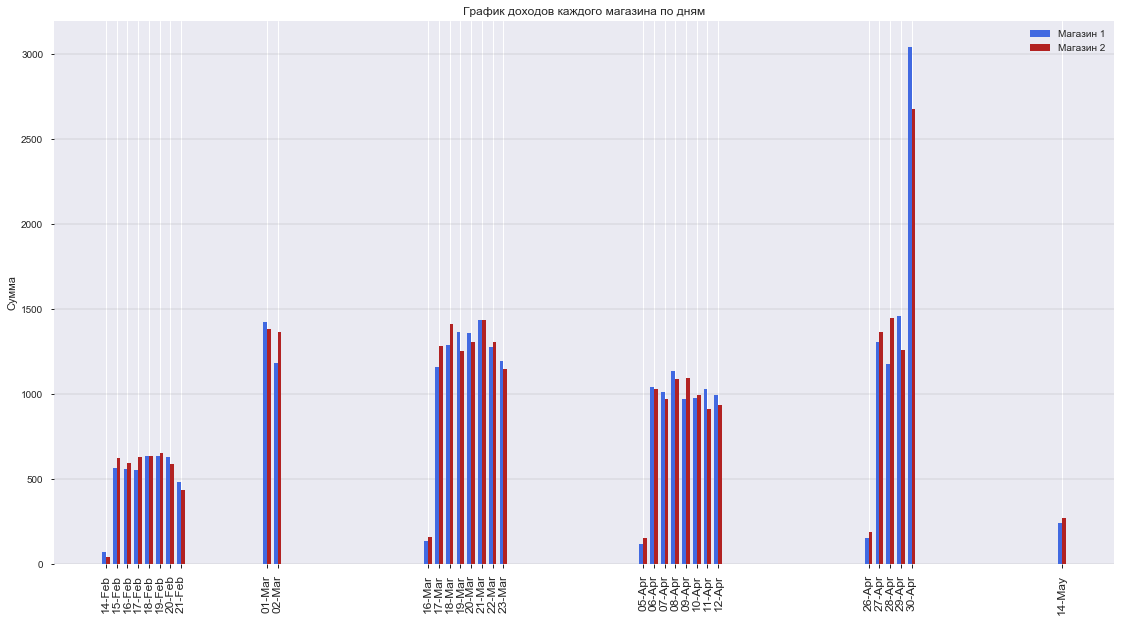

In [11]:
rcParams['figure.figsize'] = 19,10

plt.bar(data.Day, data.Store1, width=-0.35, align='edge', tick_label=data['x_label'], color="royalblue", label='Магазин 1')
plt.bar(data.Day, data.Store2, width=0.35, align='edge', tick_label=data['x_label'], color="firebrick", label='Магазин 2')

plt.tick_params(axis='x', labelrotation=90, direction='out', labelsize='large')

plt.title('График доходов каждого магазина по дням')
plt.grid(axis='y', color='black', linewidth=0.1)
plt.legend()
plt.ylabel('Сумма')

**3. Вывести top самых прибыльных клиентов.**

In [12]:
df = raw_data[['Покупатель', 'Сумма']]

In [13]:
df.groupby(['Покупатель']).sum().sort_values('Сумма', ascending=False).head(10)

,Сумма
Покупатель,
Eleanor Hunt,211.55
Karl Seal,208.58
Marion Snyder,194.61
Rhonda Kennedy,191.62
Clara Shaw,189.60
Tommy Collazo,183.63
Ana Bradley,167.67
Curtis Irby,167.62
Marcia Dean,166.61


**4. Нарисовать pie-chart с прибылью по фильмам за все время.**

In [14]:
films = raw_data[['Название фильма', 'Сумма']]

In [15]:
films = films.groupby(['Название фильма']).sum().sort_values('Сумма', ascending=False).reset_index()

grand_total = films['Сумма'].sum()
films.loc[:, 'Size%'] = films['Сумма']*100/grand_total # films.shape --> (958, 3)

In [16]:
films.shape
films.head(10)
grand_total

(958, 3)

,Название фильма,Сумма,Size%
0,Telegraph Voyage,215.75,0.351888
1,Zorro Ark,199.72,0.325744
2,Wife Turn,198.73,0.324129
3,Innocent Usual,191.74,0.312728
4,Hustler Party,190.78,0.311162
5,Saturday Lambs,190.74,0.311097
6,Titans Jerk,186.73,0.304557
7,Harry Idaho,177.73,0.289878
8,Torque Bound,169.76,0.276879
9,Dogma Family,168.72,0.275182


61312.03999999999

In [17]:
# Выделим 4 группы фильмов: группы А и В суммарно являются топ-20% от общих продаж

group_A = films.loc[:99, :] # топ 100 фильмов по прибыли от продаж
group_B = films.loc[100:199, :] # следующие за группой А 100 фильмов

group_C = films.loc[200:499, :] # следующие за группой B 300 фильмов
group_D = films.loc[500:, :] # все оставшиеся фильмы # group_D.shape --> (458, 3)

([<matplotlib.patches.Wedge at 0xb3acbd0>,
 [Text(0.822280838627058, 0.7306532846889708, 'Группа А: топ-100 фильмов'),
  Text(-0.44828553122245174, 1.0045098717765817, 'Группа B: следующие 100 фильмов'),
  Text(-0.9638791987900244, -0.5300348008762265, 'Группа C: следующие 300 фильмов'),
  Text(0.7963198242730904, -0.758864110015538, 'Группа D: оставшиеся 458 фильмов')],
 [Text(0.44851682106930435, 0.3985381552848931, '23.1%'),
  Text(-0.24451938066679182, 0.547914475514499, '17.1%'),
  Text(-0.5257522902491041, -0.2891098913870326, '35.5%'),
  Text(0.434356267785322, -0.4139258781902934, '24.2%')])

Text(0.5, 1.0, 'Распределение прибыли по фильмам за все время (plt.pie)')

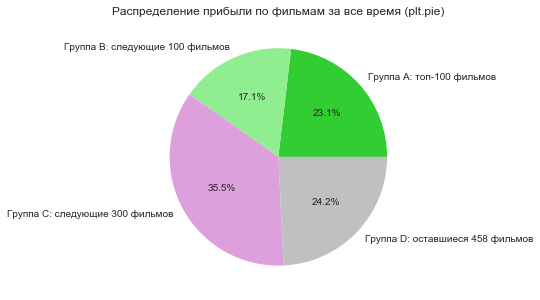

In [18]:
rcParams['figure.figsize'] = 5,5

labels = ['Группа А: топ-100 фильмов', 'Группа B: следующие 100 фильмов',\
          'Группа C: следующие 300 фильмов', 'Группа D: оставшиеся 458 фильмов']
sizes = [group_A['Size%'].sum(), group_B['Size%'].sum(), group_C['Size%'].sum(), group_D['Size%'].sum()]
colors = ['limegreen', 'lightgreen', 'plum', 'silver']

plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)

plt.title('Распределение прибыли по фильмам за все время (plt.pie)')

**5. Получить top 5 самых продаваемых фильмов в каждом магазине.**

In [19]:
rating = raw_data[['Магазин', 'Название фильма']]

In [20]:
rating_Store1 = rating.loc[rating['Магазин']=='Магазин 1', :]['Название фильма'].value_counts().to_frame(name='Number of sales')

rating_Store2 = rating.loc[rating['Магазин']=='Магазин 2', :]['Название фильма'].value_counts().to_frame(name='Number of sales')

In [21]:
rating_Store1[rating_Store1['Number of sales']==rating_Store1['Number of sales'].max()]

,Number of sales
Barbarella Streetcar,16
Tomorrow Hustler,16
Homeward Cider,16
Madness Attacks,16
Movie Shakespeare,16
Horn Working,16


In [22]:
rating_Store2[rating_Store2['Number of sales']==rating_Store2['Number of sales'].max()]

,Number of sales
Detective Vision,16
Samurai Lion,16
Salute Apollo,16
Stagecoach Armageddon,16
Caper Motions,16
Timberland Sky,16
Lola Agent,16
English Bulworth,16


In [25]:
rating_Store1.head(10)
rating_Store1.shape

,Number of sales
Barbarella Streetcar,16
Tomorrow Hustler,16
Homeward Cider,16
Madness Attacks,16
Movie Shakespeare,16
Horn Working,16
Half Outfield,15
Pickup Driving,15
Love Suicides,15
Lawless Vision,15


(759, 1)

In [26]:
rating_Store2.head(10)
rating_Store2.shape

,Number of sales
Detective Vision,16
Samurai Lion,16
Salute Apollo,16
Stagecoach Armageddon,16
Caper Motions,16
Timberland Sky,16
Lola Agent,16
English Bulworth,16
Airport Pollock,15
Majestic Floats,15


(762, 1)